In [1]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("TensorFlow:", tf.__version__)
print("Devices:", tf.config.list_physical_devices())

data_dir = "./datasets/waterfall"

def print_tree(path, indent=""):
    total_files = 0
    items = sorted(os.listdir(path))

    for item in items:
        full = os.path.join(path, item)

        if os.path.isdir(full):
            count = sum(len(files) for _, _, files in os.walk(full))
            print(f"{indent}📁 {item}  ({count} files)")

            # recursive call
            total_files += count
            print_tree(full, indent + "    ")

        else:
            total_files += 1
            print(f"{indent}📄 {item}")

    return total_files


print("\n📂 Dataset structure:")
total_files = print_tree(data_dir)

# Count total classes (directories only)
total_classes = len([d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))])

print("\n📊 Summary:")
print(f"Total classes: {total_classes}")
print(f"Total files: {total_files}")

TensorFlow: 2.20.0
Devices: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

📂 Dataset structure:
📁 16QAM  (8 files)
    📄 0e1cfa6e27cf27b164f26b8316e00d96.png
    📄 27a8846fbce39f300a7e3f80ab0403e4.png
    📄 356c8cb0c6f5f196f348285f398a51d5.png
    📄 5a22587049e4592f7d8f5f18e325a167.png
    📄 68e15ff40a6f047752260cf2e6c010ed.png
    📄 addd5a7d4367db38847b2ebd57846389.png
    📄 b84b49a9f3b083a4bbcad17c7628076b.png
    📄 d0b16042bbf4dae66c496c8fe5d7c585.png
📁 2ASK  (5 files)
    📄 07cb345494a7037e20ebb363bde0f3c2.png
    📄 3f276f26844d6bd5180896f61fa63d63.png
    📄 9a81b69030e2a069e6cf988283eaf3f4.png
    📄 9b991f559677fde6e4baa13e98180b6f.png
    📄 f36098413bcd98f2f987336e0a18c18e.png
📁 32QAM  (8 files)
    📄 31b7d72fbc0370a7f889350c8f5805f6.png
    📄 33588433b925d71bace8872a397d1e3f.png
    📄 6969a569db046789ccb0ce339f214dec.png
    📄 98a16acbd1da524f0e25ee78fd73ce6e.png
    📄 9c662595f3c42d5c70dbcee89e9631c6.png
    📄 b8ef143b8dbb7cadcf0c3501c508099e.png
    📄 de88

In [2]:
print("\n📥 Loading dataset...")

image_height = 256
image_width = 256
batch_size = 32

dataset_train = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="training"
)

dataset_val = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    seed=42,
    image_size=(image_height, image_width),
    batch_size=batch_size,
    validation_split=0.2,
    subset="validation"
)

class_names = dataset_train.class_names
num_classes = len(class_names)

print("\nClasses:", class_names)
print("Train batches:", len(dataset_train))
print("Val batches:", len(dataset_val))

# Prefetch
AUTOTUNE = tf.data.AUTOTUNE
dataset_train = dataset_train.prefetch(AUTOTUNE)
dataset_val = dataset_val.prefetch(AUTOTUNE)



📥 Loading dataset...
Found 3993 files belonging to 32 classes.
Using 3195 files for training.
Found 3993 files belonging to 32 classes.
Using 798 files for validation.

Classes: ['16QAM', '2ASK', '32QAM', '4FSK', '8PSK', 'RS41-Radiosonde', 'Radioteletype', 'ads-b', 'airband', 'ais', 'am', 'atsc', 'automatic-picture-transmission', 'bluetooth', 'cellular', 'digital-audio-broadcasting', 'digital-speech-decoder', 'drone-video', 'fm', 'hdmi', 'lora', 'morse', 'on-off-keying', 'packet', 'pocsag', 'remote-keyless-entry', 'sstv', 'uav-video', 'unknown', 'vor', 'wifi', 'z-wave']
Train batches: 100
Val batches: 25


In [3]:
from tensorflow.keras import layers, models

model = models.Sequential([
    tf.keras.Input(shape=(image_height, image_width, 3)),
    
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           4,128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,416,448 (32.11 MB)

 Trainable params: 8,416,448 (32.11 MB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n✅ Model compiled successfully")



✅ Model compiled successfully


In [5]:
print("\n🚀 Starting training...\n")

history = model.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=10
)



🚀 Starting training...

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 382ms/step - accuracy: 0.2354 - loss: 2.7093 - val_accuracy: 0.2719 - val_loss: 2.4631
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 41s 384ms/step - accuracy: 0.3496 - loss: 2.2384 - val_accuracy: 0.4211 - val_loss: 2.0552
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 382ms/step - accuracy: 0.4883 - loss: 1.7912 - val_accuracy: 0.4875 - val_loss: 1.6856
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 40s 402ms/step - accuracy: 0.6050 - loss: 1.3503 - val_accuracy: 0.6115 - val_loss: 1.3532
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 379ms/step - accuracy: 0.7070 - loss: 0.9948 - val_accuracy: 0.6404 - val_loss: 1.3314
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 39s 383ms/step - accuracy: 0.7596 - loss: 0.7865 - val_accuracy: 0.7206 - val_loss: 1.0503
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - accuracy: 0.8191 - loss: 0.5943 - val_accuracy: 0.7356 - val_loss: 1.1154
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 373ms/step - a

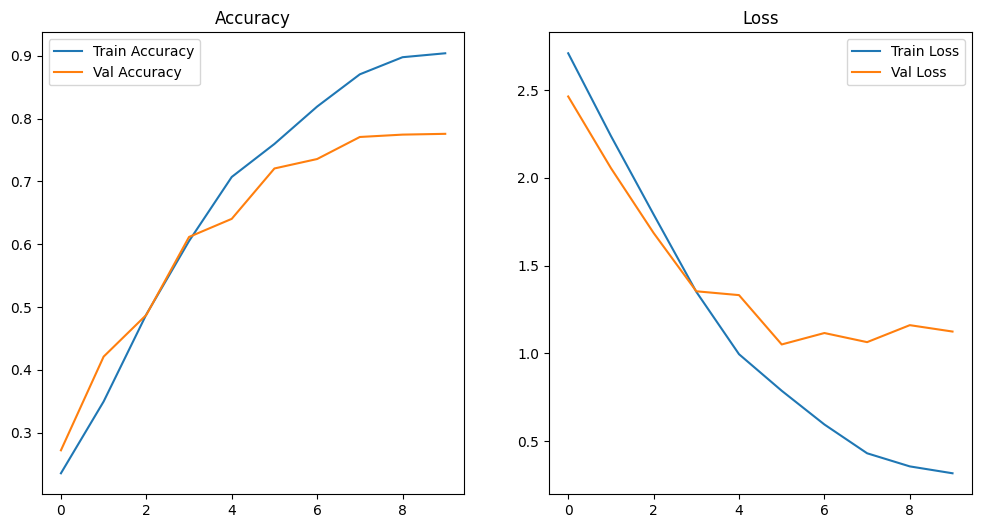

In [6]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [7]:
# === PRINT FINAL METRICS ===
train_acc = history.history["accuracy"][-1]
val_acc = history.history["val_accuracy"][-1]
train_loss = history.history["loss"][-1]
val_loss = history.history["val_loss"][-1]

print("\n📊 FINAL METRICS")
print(f"Training Accuracy     : {train_acc:.4f}")
print(f"Validation Accuracy   : {val_acc:.4f}")
print(f"Training Loss         : {train_loss:.4f}")
print(f"Validation Loss       : {val_loss:.4f}")


📊 FINAL METRICS
Training Accuracy     : 0.9039
Validation Accuracy   : 0.7757
Training Loss         : 0.3163
Validation Loss       : 1.1238


In [8]:
model.save("rf_model.keras")
print("Model saved successfully as: rf_model.keras")

Model saved successfully as: rf_model.keras


In [9]:
def rgb_to_luma(img):
    # img is shape (H, W, 3), values in [0, 255] or [0, 1]
    r, g, b = tf.split(img, 3, axis=-1)
    return 0.299*r + 0.587*g + 0.114*b   # shape = (H, W, 1)

model2 = models.Sequential([
    tf.keras.Input(shape=(image_height, image_width, 3)),

    layers.Lambda(rgb_to_luma),
    layers.Rescaling(1./255),

    layers.Conv2D(16, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model2.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

print("\n✅ Model compiled successfully")

history2 = model2.fit(
    dataset_train,
    validation_data=dataset_val,
    epochs=10
)



✅ Model compiled successfully
Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 37s 362ms/step - accuracy: 0.2685 - loss: 2.5862 - val_accuracy: 0.3734 - val_loss: 2.1802
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 355ms/step - accuracy: 0.4723 - loss: 1.8157 - val_accuracy: 0.5426 - val_loss: 1.5831
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 362ms/step - accuracy: 0.6263 - loss: 1.2628 - val_accuracy: 0.6504 - val_loss: 1.2511
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 351ms/step - accuracy: 0.7471 - loss: 0.8446 - val_accuracy: 0.7155 - val_loss: 1.0645
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/step - accuracy: 0.8050 - loss: 0.6295 - val_accuracy: 0.7544 - val_loss: 0.9990
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 36s 354ms/step - accuracy: 0.8717 - loss: 0.4314 - val_accuracy: 0.7544 - val_loss: 1.0617
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 347ms/step - accuracy: 0.9017 - loss: 0.3305 - val_accuracy: 0.7820 - val_loss: 1.1565
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 35s 348ms/s

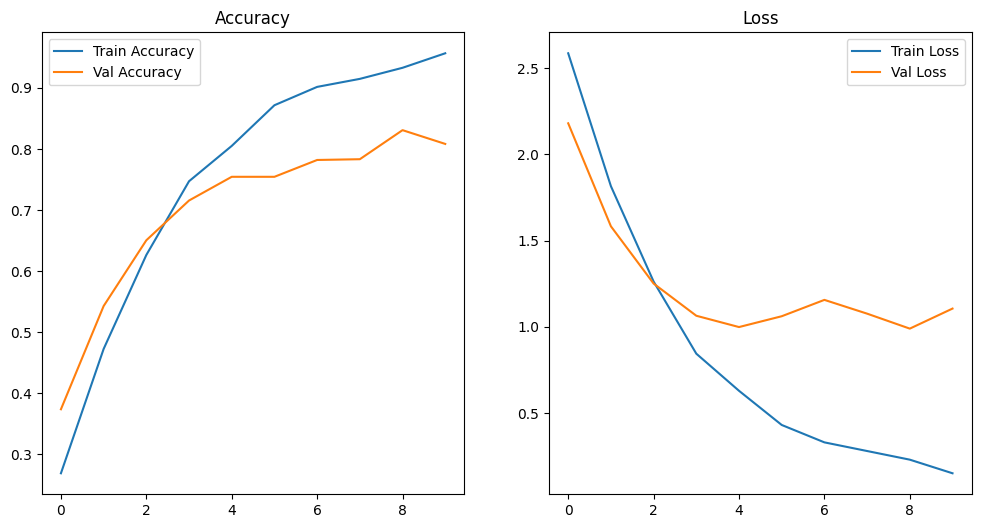


📊 FINAL METRICS
Training Accuracy     : 0.9568
Validation Accuracy   : 0.8083
Training Loss         : 0.1513
Validation Loss       : 1.1061


In [11]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend()
plt.title('Loss')

plt.show()

# === PRINT FINAL METRICS ===
train_acc = history2.history["accuracy"][-1]
val_acc = history2.history["val_accuracy"][-1]
train_loss = history2.history["loss"][-1]
val_loss = history2.history["val_loss"][-1]

print("\n📊 FINAL METRICS")
print(f"Training Accuracy     : {train_acc:.4f}")
print(f"Validation Accuracy   : {val_acc:.4f}")
print(f"Training Loss         : {train_loss:.4f}")
print(f"Validation Loss       : {val_loss:.4f}")

In [12]:
model2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 256, 256, 16)        │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 128, 128, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 128, 128, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 65536)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       8,388,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,248,482 (96.32 MB)

 Trainable params: 8,416,160 (32.11 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 16,832,322 (64.21 MB)